In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [166]:
df = pd.read_csv("dump.txt")

In [202]:
SIZE = 102
NUMBER_OF_ATOMS = 4000
sigma_array = []

$t_0 = 0$

$dt = 100$

In [203]:
for i in range(1, 102):
    atoms = df.iloc[9 * i + 4000 * (i - 1) - 1:9 * i + 4000 * i - 1]['ITEM: TIMESTEP'] \
        .str \
        .split(' ', 5, expand=True)
    if not atoms.empty:
        atoms.columns = ['id', 'type', 'xs', 'ys', 'zs']
        atoms.sort_values(by=['id'],
                          inplace=True,
                          key=lambda x: np.float64(x))
        atoms = np.array(atoms, dtype=np.float64)
        
        _, _, xs, ys, zs = atoms.T
        sigma_2 = np.mean(xs ** 2 + ys ** 2 + zs ** 2)
        sigma = np.sqrt(sigma_2)
        
        sigma_array.append(sigma)
    else:
        break

In [219]:
t = np.arange(0, (SIZE - 1) * 100, 100)

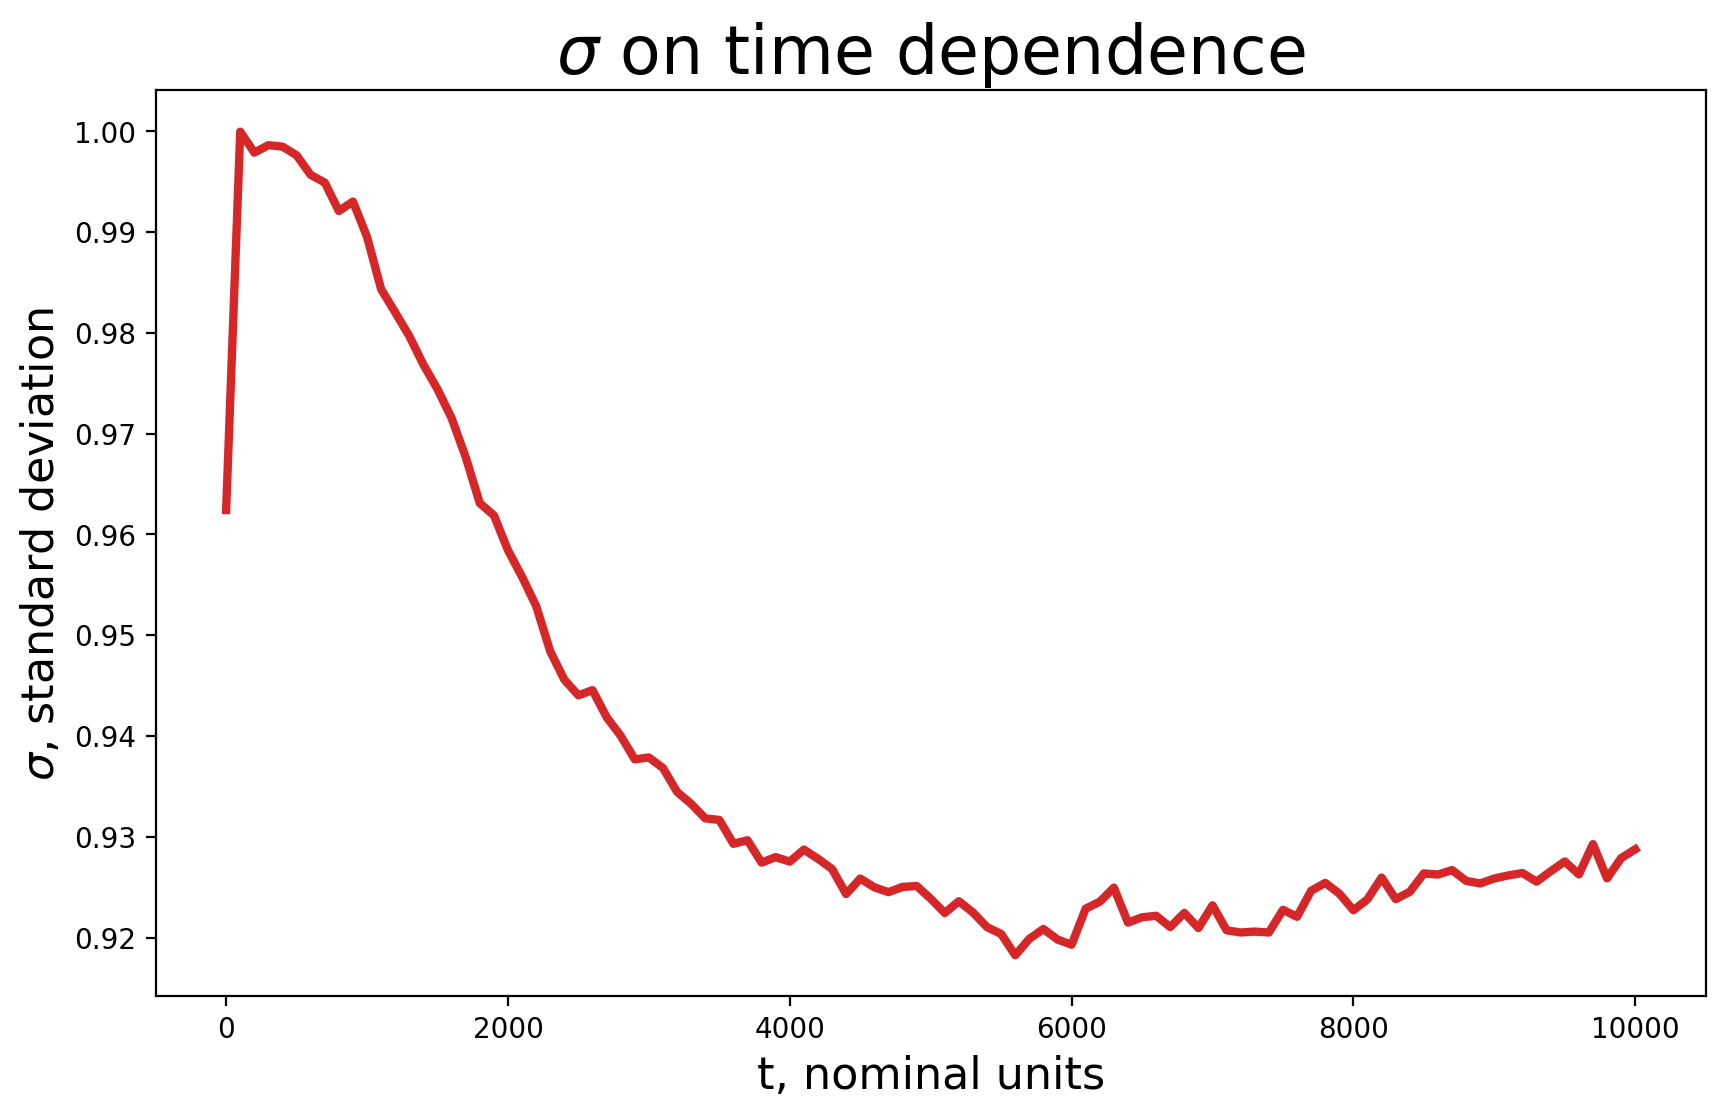

In [248]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, sigma_array, color='tab:red', linewidth=3)

plt.title(r'$\sigma$ on time dependence', fontsize=24)
plt.xlabel('t, nominal units', fontsize=16)
plt.ylabel(r'$\sigma$, standard deviation', fontsize=16)

plt.show()